In [2]:
import os #Setup a cleaner notebook
from os import path
import sys


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold #Doing kfold
from sklearn.model_selection import cross_val_score #Other way to do Kfold?


In [3]:
proj_dir = os.path.abspath(os.path.join(os.path.dirname('abundance_stoolsubset.csv'), os.pardir,))
sys.path.append(proj_dir) #Load in the dataset

In [4]:
data = pd.read_csv(path.join(proj_dir, 'data', 'abundance_stoolsubset.csv'))

C:\Users\Tommy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head()


,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
0,Candela_Africa,H10,h10,stool,n,40,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Candela_Africa,H11,h11,stool,n,29,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Candela_Africa,H12,h12,stool,n,8,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Candela_Africa,H13,h13,stool,n,34,male,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Candela_Africa,H14,h14,stool,n,30,male,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print(data.shape)

(1989, 2339)


In [7]:
data['dataset_name'].value_counts() #metahit is the IBD dataset

Neilsen_genome_assembly              382
t2dmeta_long                         290
Chatelier_gut_obesity                278
Quin_gut_liver_cirrhosis             232
hmp                                  152
WT2D                                 145
Zeller_fecal_colorectal_cancer       134
metahit                              110
t2dmeta_short                         73
Tito_subsistence_gut                  58
Loman2013_EcoliOutbreak_DNA_HiSeq     44
hmpii                                 44
Candela_Africa                        38
Loman2013_EcoliOutbreak_DNA_MiSeq      9
Name: dataset_name, dtype: int64

In [8]:
ibd = data[data["dataset_name"]=='metahit']

In [12]:
ibd.head()

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
565,metahit,MH0002,mh0002,stool,0,59,female,denmark,Illumina,20203603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
566,metahit,MH0003,mh0003,stool,0,69,male,denmark,Illumina,20203603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
567,metahit,MH0006,mh0006,stool,0,59,female,denmark,Illumina,20203603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568,metahit,MH0009,mh0009,stool,0,64,male,denmark,Illumina,20203603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
569,metahit,MH0011,mh0011,stool,0,0,female,denmark,Illumina,20203603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
ibd.disease.unique()

array(['n', 'ibd_ulcerative_colitis', 'ibd_crohn_disease'], dtype=object)

In [11]:
ibd.loc[:,'disease'] = ibd.disease.map({'n':0, 'ibd_ulcerative_colitis':1, 'ibd_crohn_disease':1}) #Map no diesease to 0 and all others to 1

C:\Users\Tommy\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [13]:
X, y = ibd.iloc[:,211:], ibd['disease'] #Separate predictors and labels

In [14]:
X.head()

,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii|t__Methanobrevibacter_smithii_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
565,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
566,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
567,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568,0.27928,0.27928,0.27928,0.27928,0.27928,0.27928,0.21411,0.21411,0.06518,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
569,4.02688,4.02688,4.00860,4.00860,4.00860,4.00860,3.71459,3.71459,0.29401,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
print(X.shape)

(110, 2128)


In [19]:
y.head

<bound method NDFrame.head of 565    0
566    0
567    0
568    0
569    0
      ..
670    1
671    0
672    0
673    0
674    0
Name: disease, Length: 110, dtype: int64>

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y
                                                    ,test_size=0.20, random_state=55)

In [52]:
rf = RandomForestClassifier(n_estimators = 500, criterion = "gini", max_features = "auto", random_state=55) #Try a random forest

In [53]:
rf.fit(X_train, y_train) #Run on single train/test

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=55, verbose=0,
                       warm_start=False)

In [54]:
rf_pred = rf.predict(X_test);rf_pred #Our predictions, note the class imbalance

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [55]:
metrics.roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]) #Calculate the AUC

0.8245614035087718

In [60]:
metrics.accuracy_score(y_test, rf.predict(X_test)) #Calculate accuracy

0.8181818181818182

In [56]:
scores = cross_val_score(rf, X, y, cv=5, scoring = 'roc_auc') #5-fold AUC

In [57]:
scores

array([0.8       , 0.95882353, 0.89411765, 0.92941176, 0.88235294])

In [74]:
importances = rf.feature_importances_ ; importances #Getting feature importances

array([0.00111925, 0.00200122, 0.00033397, ..., 0.        , 0.        ,
       0.        ])

In [84]:
print(importances.shape) #Get all the importances

(2128,)


In [88]:
names = np.array(list(X.columns.values));names #Get all bacteria names


array(['k__Archaea', 'k__Archaea|p__Euryarchaeota',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria', ...,
       'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855',
       'k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1',
       'k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965'],
      dtype='<U262')

In [82]:
len(names)

2128

In [92]:
np.concatenate((names, importances), axis=0) #This isn't the concatenation I am looking for

array(['k__Archaea', 'k__Archaea|p__Euryarchaeota',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria', ..., '0.0',
       '0.0', '0.0'], dtype='<U262')

Feature ranking:
1. feature 374 (0.024603)
2. feature 375 (0.018867)
3. feature 45 (0.015903)
4. feature 190 (0.015325)
5. feature 437 (0.012385)
6. feature 44 (0.012006)
7. feature 547 (0.009815)
8. feature 396 (0.008150)
9. feature 358 (0.008066)
10. feature 201 (0.007456)
11. feature 357 (0.007401)
12. feature 436 (0.007323)
13. feature 335 (0.007080)
14. feature 191 (0.006794)
15. feature 548 (0.006770)
16. feature 200 (0.006766)
17. feature 353 (0.006565)
18. feature 148 (0.006302)
19. feature 549 (0.006207)
20. feature 19 (0.005994)
21. feature 419 (0.005931)
22. feature 125 (0.005869)
23. feature 345 (0.005829)
24. feature 432 (0.005701)
25. feature 626 (0.005699)
26. feature 395 (0.005556)
27. feature 415 (0.005555)
28. feature 420 (0.005400)
29. feature 631 (0.005396)
30. feature 327 (0.005316)
31. feature 413 (0.004907)
32. feature 629 (0.004857)
33. feature 1062 (0.004825)
34. feature 417 (0.004817)
35. feature 371 (0.004732)
36. feature 391 (0.004727)
37. feature 344 (0.004

938. feature 61 (0.000000)
939. feature 60 (0.000000)
940. feature 43 (0.000000)
941. feature 31 (0.000000)
942. feature 30 (0.000000)
943. feature 29 (0.000000)
944. feature 27 (0.000000)
945. feature 26 (0.000000)
946. feature 25 (0.000000)
947. feature 23 (0.000000)
948. feature 22 (0.000000)
949. feature 21 (0.000000)
950. feature 17 (0.000000)
951. feature 9 (0.000000)
952. feature 207 (0.000000)
953. feature 209 (0.000000)
954. feature 324 (0.000000)
955. feature 210 (0.000000)
956. feature 323 (0.000000)
957. feature 314 (0.000000)
958. feature 313 (0.000000)
959. feature 306 (0.000000)
960. feature 305 (0.000000)
961. feature 304 (0.000000)
962. feature 303 (0.000000)
963. feature 302 (0.000000)
964. feature 298 (0.000000)
965. feature 297 (0.000000)
966. feature 268 (0.000000)
967. feature 255 (0.000000)
968. feature 254 (0.000000)
969. feature 248 (0.000000)
970. feature 242 (0.000000)
971. feature 241 (0.000000)
972. feature 240 (0.000000)
973. feature 239 (0.000000)
974. fe

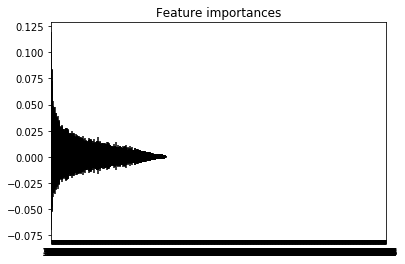

In [68]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



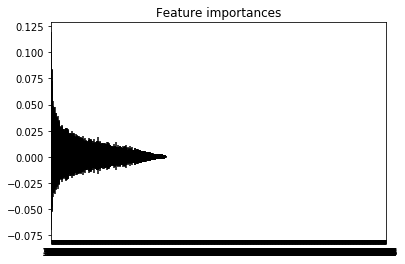

In [69]:
# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()